<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 6)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

## Table of Content

1. **[Pivot Table](#pivoting)**
2. **[Index](#indexing)**
3. **[Summary Statistics](#summary_statistics)**
4. **[Duplicate](#duplicate)**
5. **[Replace](#replace)**
6. **[Visulaization](#visulaization)**

### Imporing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's begin with some hands-on practice exercises

<a id='pivoting'></a>
## Pivot Table

<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 1. Find the average sales for each store
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Store</th>
<th>Location</th>
<th>Sales</th>
</tr>
<tr>
<td>A</td>
<td>Mumbai</td>
<td>40000</td>
</tr>
<tr>
<td>B</td>
<td>Pune</td>
<td>45000</td>
</tr>
<tr>
<td>A</td>
<td>Hyderabad</td>
<td>50000</td>
</tr>
<tr>
<td>C</td>
<td>Mumbai</td>
<td>90000</td>
</tr>
<tr>
<td>D</td>
<td>Pune</td>
<td>89000</td>
</tr>
<tr>
<td>A</td>
<td>Delhi</td>
<td>87000</td>
</tr>
<tr>
<td>D</td>
<td>Hyderabad</td>
<td>85000</td>
</tr>
<tr>
<td>A</td>
<td>Pune</td>
<td>78000</td>
</tr>
<tr>
<td>C</td>
<td>Mumbai</td>
<td>89000</td>
</tr>
<tr>
<td>B</td>
<td>Pune</td>
<td>70000</td>
</tr>
   
</table>

In [4]:
# Creating the dataframe
data = {'Store': ['A', 'B', 'A', 'C', 'D', 'A', 'D', 'A', 'C', 'B'],
        'Location': ['Mumbai', 'Pune', 'Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Hyderabad', 'Pune', 'Mumbai', 'Pune'],
        'Sales': [40000, 45000, 50000, 90000, 89000, 87000, 85000, 78000, 89000, 70000]}

df = pd.DataFrame(data)
df.head()

,Store,Location,Sales
0,A,Mumbai,40000
1,B,Pune,45000
2,A,Hyderabad,50000
3,C,Mumbai,90000
4,D,Pune,89000


In [6]:
df.groupby('Store')['Sales'].mean().reset_index()

,Store,Sales
0,A,63750.0
1,B,57500.0
2,C,89500.0
3,D,87000.0


In [8]:
avg_sales = pd.pivot_table(df, index = "Store", values = "Sales", aggfunc = "mean")
avg_sales.reset_index()

,Store,Sales
0,A,63750.0
1,B,57500.0
2,C,89500.0
3,D,87000.0


<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 2. Compute the average sales for each store in every city
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Store</th>
<th>Location</th>
<th>Sales</th>
</tr>
<tr>
<td>A</td>
<td>Mumbai</td>
<td>40000</td>
</tr>
<tr>
<td>B</td>
<td>Pune</td>
<td>45000</td>
</tr>
<tr>
<td>A</td>
<td>Hyderabad</td>
<td>50000</td>
</tr>
<tr>
<td>C</td>
<td>Mumbai</td>
<td>90000</td>
</tr>
<tr>
<td>D</td>
<td>Pune</td>
<td>89000</td>
</tr>
<tr>
<td>A</td>
<td>Delhi</td>
<td>87000</td>
</tr>
<tr>
<td>D</td>
<td>Hyderabad</td>
<td>85000</td>
</tr>
<tr>
<td>A</td>
<td>Pune</td>
<td>78000</td>
</tr>
<tr>
<td>C</td>
<td>Mumbai</td>
<td>89000</td>
</tr>
<tr>
<td>B</td>
<td>Pune</td>
<td>70000</td>
</tr>
   
</table>

In [11]:
# Creating the dataframe
data = {'Store': ['A', 'B', 'A', 'C', 'D', 'A', 'D', 'A', 'C', 'B'],
        'Location': ['Mumbai', 'Pune', 'Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Hyderabad', 'Pune', 'Mumbai', 'Pune'],
        'Sales': [40000, 45000, 50000, 90000, 89000, 87000, 85000, 78000, 89000, 70000]}

df = pd.DataFrame(data)

In [12]:
df.groupby(['Store','Location'])['Sales'].mean()

Store  Location 
A      Delhi        87000.0
       Hyderabad    50000.0
       Mumbai       40000.0
       Pune         78000.0
B      Pune         57500.0
C      Mumbai       89500.0
D      Hyderabad    85000.0
       Pune         89000.0
Name: Sales, dtype: float64

In [14]:
avg_sales = pd.crosstab(df["Store"], df["Location"], values = df["Sales"],
                        aggfunc = "mean", colnames = ["City"])
avg_sales.fillna("-")

City,Delhi,Hyderabad,Mumbai,Pune
Store,,,,
A,87000.0,50000.0,40000.0,78000.0
B,-,-,-,57500.0
C,-,-,89500.0,-
D,-,85000.0,-,89000.0


<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 3. Compute the minimum sales for each store in every city
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Store</th>
<th>Location</th>
<th>Sales</th>
</tr>
<tr>
<td>A</td>
<td>Mumbai</td>
<td>40000</td>
</tr>
<tr>
<td>B</td>
<td>Pune</td>
<td>45000</td>
</tr>
<tr>
<td>A</td>
<td>Hyderabad</td>
<td>50000</td>
</tr>
<tr>
<td>C</td>
<td>Mumbai</td>
<td>90000</td>
</tr>
<tr>
<td>D</td>
<td>Pune</td>
<td>89000</td>
</tr>
<tr>
<td>A</td>
<td>Delhi</td>
<td>87000</td>
</tr>
<tr>
<td>D</td>
<td>Hyderabad</td>
<td>85000</td>
</tr>
<tr>
<td>A</td>
<td>Pune</td>
<td>78000</td>
</tr>
<tr>
<td>C</td>
<td>Mumbai</td>
<td>89000</td>
</tr>
<tr>
<td>B</td>
<td>Pune</td>
<td>70000</td>
</tr>
   
</table>

In [15]:
# Creating the dataframe
data = {'Store': ['A', 'B', 'A', 'C', 'D', 'A', 'D', 'A', 'C', 'B'],
        'Location': ['Mumbai', 'Pune', 'Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Hyderabad', 'Pune', 'Mumbai', 'Pune'],
        'Sales': [40000, 45000, 50000, 90000, 89000, 87000, 85000, 78000, 89000, 70000]}

df = pd.DataFrame(data)

In [16]:
df.groupby(['Store','Location'])['Sales'].min()

Store  Location 
A      Delhi        87000
       Hyderabad    50000
       Mumbai       40000
       Pune         78000
B      Pune         45000
C      Mumbai       89000
D      Hyderabad    85000
       Pune         89000
Name: Sales, dtype: int64

In [17]:
avg_sales = pd.crosstab(df["Store"], df["Location"], values = df["Sales"],
                        aggfunc = "min", colnames = ["City"])
avg_sales.fillna("-")

City,Delhi,Hyderabad,Mumbai,Pune
Store,,,,
A,87000.0,50000.0,40000.0,78000.0
B,-,-,-,45000.0
C,-,-,89000.0,-
D,-,85000.0,-,89000.0


<a id='indexing'></a>
## Index

<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 4.  Set 'Name column as index for the below dataframe
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Name</th>
<th>City</th>
<th>Sales</th>
<th>Expenses</th>
</tr>
<tr>
<td>John</td>
<td>New York</td>
<td>60000</td>
<td>12000</td>
</tr>
<tr>
<td>Robert</td>
<td>Chicago</td>
<td>42000</td>
<td>33000</td>
</tr>
<tr>
<td>Jony</td>
<td>Texas</td>
<td>50000</td>
<td>40000</td>
</tr>
<tr>
<td>Mia</td>
<td>California</td>
<td>24000</td>
<td>34000</td>
</tr>
<tr>
<td>Edward</td>
<td>Sydney</td>
<td>12000</td>
<td>28000</td>
</tr>
<tr>
<td>Thomas</td>
<td>New York</td>
<td>82000</td>
<td>19000</td>
</tr>
<tr>
<td>Ethan</td>
<td>Chicago</td>
<td>59000</td>
<td>32000</td>
</tr>
<tr>
<td>Olivia</td>
<td>Sydeney</td>
<td>85000</td>
<td>10000</td>
</tr>
<tr>
<td>Arun</td>
<td>California</td>
<td>97000</td>
<td>49000</td>
</tr>
<tr>
<td>Ankita</td>
<td>Texas</td>
<td>35000</td>
<td>34000</td>
</tr>
<tr>
<td>Paulo</td>
<td>Chicago</td>
<td>47000</td>
<td>55000</td>
</tr>

</table>

In [18]:
# Creating the dataframe
data = {'Name': ['John', 'Robert', 'Jony', 'Mia', 'Edward', 'Thomas', 'Ethan', 'Olivia', 'Arun', 'Ankita', 'Paulo'],
        'City': ['New York', 'Chicago', 'Texas', 'California', 'Sydney', 'New York', 'Chicago', 'Sydeney', 'California', 'Texas', 'Chicago'],
        'Sales': [60000, 42000, 50000, 24000, 12000, 82000, 59000, 85000, 97000, 35000, 47000],
        'Expenses': [12000, 33000, 40000, 34000, 28000, 19000, 32000, 10000, 49000, 34000, 55000]}

df = pd.DataFrame(data)

In [19]:
df.set_index('Name', inplace = True)
df

,City,Sales,Expenses
Name,,,
John,New York,60000,12000
Robert,Chicago,42000,33000
Jony,Texas,50000,40000
Mia,California,24000,34000
Edward,Sydney,12000,28000
Thomas,New York,82000,19000
Ethan,Chicago,59000,32000
Olivia,Sydeney,85000,10000
Arun,California,97000,49000


In [20]:
df.index

Index(['John', 'Robert', 'Jony', 'Mia', 'Edward', 'Thomas', 'Ethan', 'Olivia',
       'Arun', 'Ankita', 'Paulo'],
      dtype='object', name='Name')

<a id='summary_statistics'></a>
## Summary Statistics

<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 5.  Find the descriptive statistics for the sales column of the given dataframe
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Month</th>
<th>Sales</th>
<th>Seasons</th>
</tr>
<tr>
<td>Jan</td>
<td>22000</td>
<td>Winter</td>
</tr>
<tr>
<td>Feb</td>
<td>27000</td>
<td>Winter</td>
</tr>
<tr>
<td>Mar</td>
<td>25000</td>
<td>Spring</td>
</tr>
<tr>
<td>Apr</td>
<td>29000</td>
<td>Spring</td>
</tr>
<tr>
<td>May</td>
<td>35000</td>
<td>Spring</td>
</tr>
<tr>
<td>June</td>
<td>67000</td>
<td>Summer</td>
</tr>
<tr>
<td>July</td>
<td>78000</td>
<td>Summer</td>
</tr>
<tr>
<td>Aug</td>
<td>67000</td>
<td>Summer</td>
</tr>
<tr>
<td>Sep</td>
<td>56000</td>
<td>Fall</td>
</tr>
<tr>
<td>Oct</td>
<td>56000</td>
<td>Fall</td>
</tr>
<tr>
<td>Nov</td>
<td>56000</td>
<td>Fall</td>
</tr>
<tr>
<td>Dec</td>
<td>60000</td>
<td>Winter</td>
</tr>

</table>

In [21]:
# Creating the dataframe
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        'Sales': [22000, 27000, 25000, 29000, 35000, 67000, 78000, 67000, 56000, 56000, 56000, 60000],
        'Seasons': ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']}

df = pd.DataFrame(data)

In [22]:
df['Sales'].describe()

count       12.000000
mean     48166.666667
std      19385.249000
min      22000.000000
25%      28500.000000
50%      56000.000000
75%      61750.000000
max      78000.000000
Name: Sales, dtype: float64

In [23]:
df.describe(include='all')

,Month,Sales,Seasons
count,12,12.000000,12
unique,12,NaN,4
top,Jan,NaN,Winter
freq,1,NaN,3
mean,NaN,48166.666667,NaN
std,NaN,19385.249000,NaN
min,NaN,22000.000000,NaN
25%,NaN,28500.000000,NaN
50%,NaN,56000.000000,NaN
75%,NaN,61750.000000,NaN


In [24]:
import os
os.getcwd()

'/Users/abhisheaksaraswat/Documents/GL/Python/Week-6/Week 6 - Advanced Pandas and Visualization - Inclass Exercise'

In [25]:
sales = pd.read_csv('Superstore.csv')

In [26]:
sales.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [27]:
len(sales)

9994

In [32]:
round(len(sales[sales["Sales"] < 17.28]) / len(sales),2) * 100

25.0

In [33]:
round(len(sales[sales["Sales"] < 54.49]) / len(sales),2) * 100

50.0

In [34]:
round(len(sales[sales["Sales"] < 209.94]) / len(sales),2) * 100

75.0

In [40]:
sales.describe(include = 'all').fillna('-')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.0,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.0,9994,9994,9994,9994,9994,9994.0,9994.0,9994.0,9994.0
unique,-,5009,1237,1334,4,793,793,3,1,531,...,-,4,1862,3,17,1850,-,-,-,-
top,-,CA-2017-100111,05/09/16,16/12/15,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,-,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,-,-,-,-
freq,-,14,38,35,5968,37,37,5191,9994,915,...,-,3203,19,6026,1523,48,-,-,-,-
mean,4997.5,-,-,-,-,-,-,-,-,-,...,55190.379428,-,-,-,-,-,229.858001,3.789574,0.156203,28.656896
std,2885.163629,-,-,-,-,-,-,-,-,-,...,32063.69335,-,-,-,-,-,623.245101,2.22511,0.206452,234.260108
min,1.0,-,-,-,-,-,-,-,-,-,...,1040.0,-,-,-,-,-,0.444,1.0,0.0,-6599.978
25%,2499.25,-,-,-,-,-,-,-,-,-,...,23223.0,-,-,-,-,-,17.28,2.0,0.0,1.72875
50%,4997.5,-,-,-,-,-,-,-,-,-,...,56430.5,-,-,-,-,-,54.49,3.0,0.2,8.6665
75%,7495.75,-,-,-,-,-,-,-,-,-,...,90008.0,-,-,-,-,-,209.94,5.0,0.2,29.364


In [36]:
sales['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [37]:
sales['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [38]:
sales['Customer Name'].nunique()

793

In [39]:
sales['Customer Name'].value_counts().head(1)

Customer Name
William Brown    37
Name: count, dtype: int64

<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 6.  Find the median of sales for each season
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Month</th>
<th>Sales</th>
<th>Seasons</th>
</tr>
<tr>
<td>Jan</td>
<td>22000</td>
<td>Winter</td>
</tr>
<tr>
<td>Feb</td>
<td>27000</td>
<td>Winter</td>
</tr>
<tr>
<td>Mar</td>
<td>25000</td>
<td>Spring</td>
</tr>
<tr>
<td>Apr</td>
<td>29000</td>
<td>Spring</td>
</tr>
<tr>
<td>May</td>
<td>35000</td>
<td>Spring</td>
</tr>
<tr>
<td>June</td>
<td>67000</td>
<td>Summer</td>
</tr>
<tr>
<td>July</td>
<td>78000</td>
<td>Summer</td>
</tr>
<tr>
<td>Aug</td>
<td>67000</td>
<td>Summer</td>
</tr>
<tr>
<td>Sep</td>
<td>56000</td>
<td>Fall</td>
</tr>
<tr>
<td>Oct</td>
<td>56000</td>
<td>Fall</td>
</tr>
<tr>
<td>Nov</td>
<td>56000</td>
<td>Fall</td>
</tr>
<tr>
<td>Dec</td>
<td>60000</td>
<td>Winter</td>
</tr>

</table>

In [41]:
# Creating the dataframe
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        'Sales': [22000, 27000, 25000, 29000, 35000, 67000, 78000, 67000, 56000, 56000, 56000, 60000],
        'Seasons': ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']}

df = pd.DataFrame(data)

In [42]:
df.groupby('Seasons')['Sales'].median()

Seasons
Fall      56000.0
Spring    29000.0
Summer    67000.0
Winter    27000.0
Name: Sales, dtype: float64

<a id='duplicate'></a>
##  Duplicate

<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 7. Find duplicate rows in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Name</th>
<th>Salary</th>
<th>City</th>
</tr>
<tr>
<td>John</td>
<td>3400</td>
<td>Sydeny</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Chicago</td>
</tr>
<tr>
<td>Aadi</td>
<td>1600</td>
<td>New York</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Chicago</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Chicago</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Texas</td>
</tr>
<tr>
<td>Aadi</td>
<td>4000</td>
<td>London</td>
</tr>
<tr>
<td>Sachine</td>
<td>3000</td>
<td>Chicago</td>
</tr>
   
</table>

In [43]:
# Given dataframe
data = {'Name': ['John', 'Robert', 'Aadi', 'Robert', 'Robert', 'Robert', 'Aadi', 'Sachine'],
        'Salary': [3400, 3000, 1600, 3000, 3000, 3000, 4000, 3000],
        'City': ['Sydney', 'Chicago', 'New York', 'Chicago', 'Chicago', 'Texas', 'London', 'Chicago']}

df = pd.DataFrame(data)

In [45]:
df[df.duplicated()]

,Name,Salary,City
3,Robert,3000,Chicago
4,Robert,3000,Chicago


In [46]:
df.drop_duplicates()

,Name,Salary,City
0,John,3400,Sydney
1,Robert,3000,Chicago
2,Aadi,1600,New York
5,Robert,3000,Texas
6,Aadi,4000,London
7,Sachine,3000,Chicago


<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 8.  Select the duplicated rows based on the column names 'Salary' and 'City'
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Name</th>
<th>Salary</th>
<th>City</th>
</tr>
<tr>
<td>John</td>
<td>3400</td>
<td>Sydeny</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Chicago</td>
</tr>
<tr>
<td>Aadi</td>
<td>1600</td>
<td>New York</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Chicago</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Chicago</td>
</tr>
<tr>
<td>Robert</td>
<td>3000</td>
<td>Texas</td>
</tr>
<tr>
<td>Aadi</td>
<td>4000</td>
<td>London</td>
</tr>
<tr>
<td>Sachine</td>
<td>3000</td>
<td>Chicago</td>
</tr>
   
</table>

In [47]:
# Given dataframe
data = {'Name': ['John', 'Robert', 'Aadi', 'Robert', 'Robert', 'Robert', 'Aadi', 'Sachine'],
        'Salary': [3400, 3000, 1600, 3000, 3000, 3000, 4000, 3000],
        'City': ['Sydney', 'Chicago', 'New York', 'Chicago', 'Chicago', 'Texas', 'London', 'Chicago']}

df = pd.DataFrame(data)

In [49]:
df[df.duplicated(subset=['Salary','City'])]

,Name,Salary,City
3,Robert,3000,Chicago
4,Robert,3000,Chicago
7,Sachine,3000,Chicago


<a id='replace'></a>
## Replace

<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 9.  Replace 'football' with 'hockey' in the column tournament
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table>
<tr>
<th>Days</th>
<th>Tournament</th>
</tr>
<tr>
<td>Mon</td>
<td>Football</td>
</tr>
<tr>
<td>Tues</td>
<td>Cricket</td>
</tr>
<tr>
<td>Wed</td>
<td>Football</td>
</tr>
<tr>
<td>Thurs</td>
<td>Football</td>
</tr>
<tr>
<td>Fri</td>
<td>Cricket</td>
</tr>
   
</table>

In [50]:
# Given dataframe
data = {'Days': ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'],
        'Tournament': ['Football', 'Cricket', 'Football', 'Football', 'Cricket']}

df = pd.DataFrame(data)

In [51]:
df['Tournament'] = df['Tournament'].replace('Football','Hockey')

In [52]:
df.head()

,Days,Tournament
0,Mon,Hockey
1,Tues,Cricket
2,Wed,Hockey
3,Thurs,Hockey
4,Fri,Cricket


<table align="left" width=100%>
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=4px>
                    <b> 10.  Replace all 0's with male and all 1's with female in the gender column
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the dataframe given below:**
   
<table>
<tr>
<th>Name</th>
<th>Num_Children</th>
<th>Gender</th>
</tr>
<tr>
<td>John</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>Robert</td>
<td>4</td>
<td>0</td>
</tr>
<tr>
<td>Johny</td>
<td>5</td>
<td>0</td>
</tr>
<tr>
<td>Mia</td>
<td>3</td>
<td>1</td>
</tr>
   
</table>

In [53]:
# Given dataframe
data = {'Name': ['John', 'Robert', 'Johny', 'Mia'],
        'Num_Children': [0, 4, 5, 3],
        'Gender': [0, 0, 0, 1]}

df = pd.DataFrame(data)

In [54]:
df['Gender'] = df['Gender'].replace({0:'Male',1:"Female"})

In [55]:
df

,Name,Num_Children,Gender
0,John,0,Male
1,Robert,4,Male
2,Johny,5,Male
3,Mia,3,Female


<a id='visulaization'></a>
## Visualization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Plot a scatter plot for the following data. Also add title and axis names</b>
                </font>
            </div>
        </td>
    </tr>
</table>

            bmi = (18, 34, 54, 45, 45, 45, 23, 23, 54)
            medical_claim = (145, 456, 764, 234, 156, 786, 345, 455, 675)

In [56]:
# create tuples of the above data
bmi = (12, 34, 54, 45, 45, 45, 23, 23, 54)
medical_claim = (145, 456, 764, 234, 156, 786, 345, 455, 675)

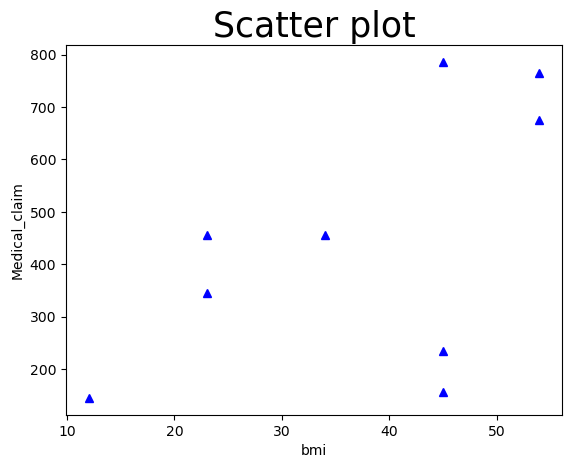

In [59]:
plt.plot(bmi, medical_claim, "^", color = 'blue')
plt.title("Scatter plot", fontsize = 25)
plt.xlabel("bmi")
plt.ylabel("Medical_claim")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 12. The exports and imports (in billion dollars) is given for a country from 2001 to 2005. Draw a barplot for the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table>
  <tr>
  <th>Year</th>
  <th>Import</th>
  <th>Export</th>
  </tr>
  <tr>
  <td>2001</td>
  <td>54.4</td>
  <td>42.5 </td>
  </tr>
  <tr>
  <td>2002</td>
  <td>53.8</td>
  <td>44.5</td>
  </tr>
  <tr>
  <td>2003</td>
  <td>61.6</td>
  <td>48.3</td>
  </tr>
  <tr>
  <td>2004</td>
  <td>74.15</td>
  <td>57.24</td>
  </tr>
  <tr>
  <td>2005</td>
  <td>89.33</td>
  <td>69.18</td>
  </tr>
</table>

In [60]:
# create lists of the above data
# create a list of years
year = ['2001', '2002', '2003', '2004', '2005']

# create a list of imports
imports = (54.4, 53.8, 61.6, 74.15, 89.33)

# create a list of exports
exports = (42.5, 44.5, 48.3, 57.24, 69.18)

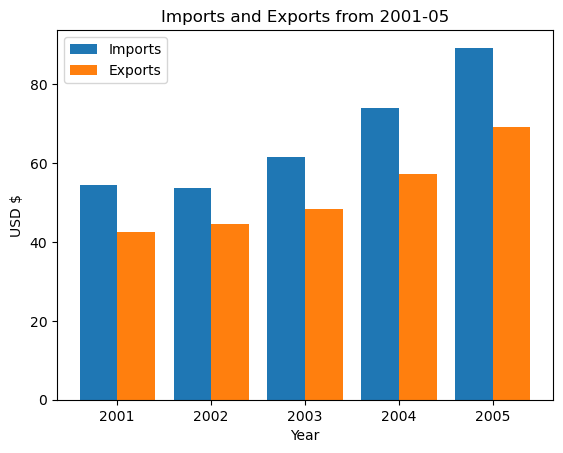

In [64]:
x = np.arange(len(year))
fig, ax = plt.subplots()
width = 0.4
bar1 = ax.bar(x-width / 2, imports, width, label = 'Imports')
bar2 = ax.bar(x+width / 2, exports, width, label = 'Exports')
plt.title("Imports and Exports from 2001-05")
plt.xticks([tick for tick in range(len(bar1))], year)
plt.xlabel("Year")
plt.ylabel("USD $")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 13. Plot a  strip plot with 'species' and 'sepal_length' for the inbuilt data-set 'iris' using seaborn
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


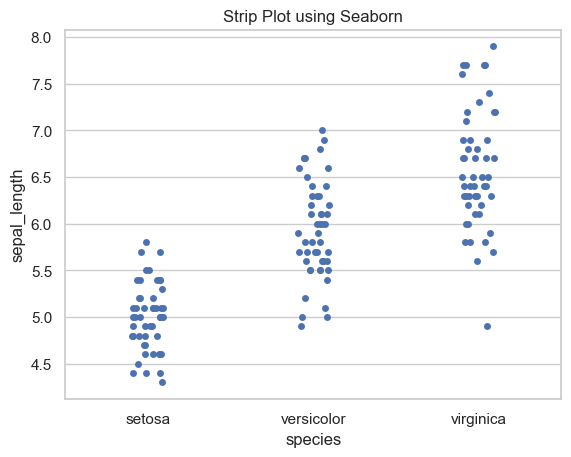

In [66]:
sns.set_theme(style = 'whitegrid')
sns.stripplot(x = "species", y = "sepal_length", data = iris)
plt.title("Strip Plot using Seaborn")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 14. Import the 'iris' dataset from seaborn and plot a heat map for the correlation matrix between the numerical variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
corr = iris.corr(numeric_only=True)

In [69]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


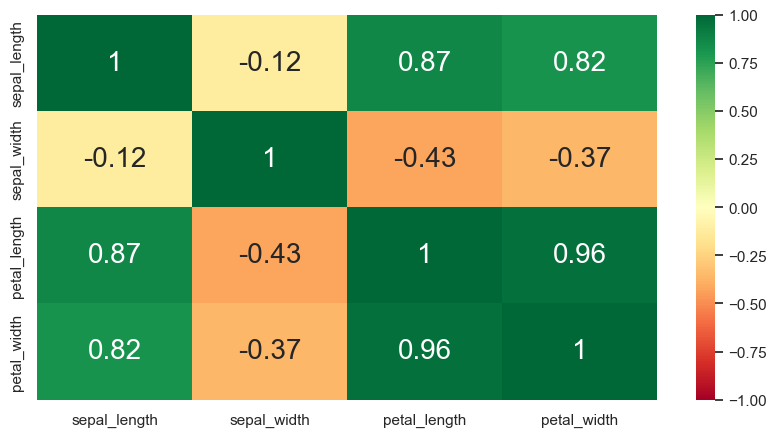

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap = "RdYlGn", vmax = 1.0, vmin = -1.0, annot = True, annot_kws={"size":20})
plt.show()